# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [50]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [ ]:
# ===== Twoja implementacja tutaj =====
A, b = main.spare_matrix_Abt(m=50, n=12)
time =[]
norm = []
memory = []

# Pierwsza metoda
A_new1, b_new1 = main.square_from_rectan(A, b)
x1 = np.linalg.solve(A_new1, b_new1)
norm.append(main.residual_norm(A, x1, b))
time_temp1 = %timeit -r 5 -n 10 -o np.linalg.solve(A_new1, b_new1)
time.append(time_temp1.average)
mem_temp1 = %memit -o np.linalg.solve(A_new1, b_new1)
memory.append(mem_temp1)

# Druga metoda
x2 = np.linalg.lstsq(A, b)[0]
norm.append(main.residual_norm(A, x2, b))
time_temp2 = %timeit -r 5 -n 10 -o np.linalg.lstsq(A, b)[0]
time.append(time_temp2.average)
mem_temp2 = %memit -o np.linalg.lstsq(A, b)[0]
memory.append(mem_temp2)
    
# Trzecia metoda
Q, R = np.linalg.qr(A)
b_q = Q.T @ b
x3 = sp.linalg.solve_triangular(R, b_q)
norm.append(main.residual_norm(A, x3, b))
time_temp3 = %timeit -r 5 -n 10 -o sp.linalg.solve_triangular(R, b_q)
time.append(time_temp3.average)
mem_temp3 = %memit -o sp.linalg.solve_triangular(R, b_q)
memory.append(mem_temp3)

# Czwarta metoda
U, s, Vt = np.linalg.svd(A, full_matrices=False)
x4 = Vt.T @ np.diag(1 / s) @ U.T @ b
norm.append(main.residual_norm(A, x4, b))
time_temp4 = %timeit -r 5 -n 10 -o (Vt.T @ np.diag(1 / s) @ U.T @ b)
time.append(time_temp4.average)
mem_temp4 = %memit -o (Vt.T @ np.diag(1 / s) @ U.T @ b)
memory.append(mem_temp4)


16.1 µs ± 10.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 152.36 MiB, increment: 0.00 MiB
86.2 µs ± 22.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


C:\Users\macie\AppData\Local\Temp\ipykernel_51016\530734228.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x2 = np.linalg.lstsq(A, b)[0]
<magic-timeit>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


peak memory: 152.36 MiB, increment: 0.00 MiB
30.5 µs ± 12.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 152.36 MiB, increment: 0.00 MiB
28.7 µs ± 11.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 152.36 MiB, increment: 0.00 MiB


: 

: 

In [ ]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.562e-08
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  8.113e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  8.818000787869096e-06
Druga metoda    :  0.00011859599966555835
Trzecia metoda  :  2.7308000717312098e-05
Czwarta metoda  :  3.1302000861614944e-05

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 152.21 MiB, increment: 0.00 MiB
Druga metoda    :  peak memory: 152.21 MiB, increment: 0.00 MiB
Trzecia metoda  :  peak memory: 152.21 MiB, increment: 0.00 MiB
Czwarta metoda  :  peak memory: 152.36 MiB, increment: 0.00 MiB


: 

: 

: 

**Wnioski:**<br>
Dla wszystkich metod uzyskano małe wartości normy residuum. Najmniejsza błędy residuum uzyskały druga i trzecia metoda<br>
Pod względem czasu obliczeń najszybsza jest pierwsza metoda, natomiast najpowolniejsza druga, co może wynikać ze złożonści użytej implementacji.<br>
Zużycie pamięci we wszystkich przypadkach jest takie samo - ok. 152 MiB, co może sugerować że różnice pomiędzy dotyczą głównie wydajności obliczeniowej, a nie zapotrzebowania na zasoby.

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [ ]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

: 

: 

--------------Prosta regresja liniowa--------------
Dla dochodów: 140, błąd regresji wyniósł 17.63219058686809
Dla dochodów: 190, błąd regresji wyniósł 17.173155142359093
Dla dochodów: 250, błąd regresji wyniósł -35.37768739105172
Dla dochodów: 270, błąd regresji wyniósł -39.5613015688553
Dla dochodów: 290, błąd regresji wyniósł -3.7449157466589327
Dla dochodów: 310, błąd regresji wyniósł 2.0714700755374906
Dla dochodów: 340, błąd regresji wyniósł 15.796048808832097
Dla dochodów: 360, błąd regresji wyniósł 21.612434631028464
Dla dochodów: 420, błąd regresji wyniósł -20.938407902382323
Dla dochodów: 390, błąd regresji wyniósł 25.33701336432307
Dla przeprowadzonej prostej regresji błąd wyniósł 72.3726315120668
-------------Dopasowanie wielomianowe---------------
Dla dochodów: 140, błąd regresji wyniósł 17.632190586867807
Dla dochodów: 190, błąd regresji wyniósł 17.173155142358837
Dla dochodów: 250, błąd regresji wyniósł -35.37768739105195
Dla dochodów: 270, błąd regresji wyniósł -39.5613

[Text(0.5, 1.0, 'Wykres wydatków względem dochodów z naniesioną regresją liniową prostą')]

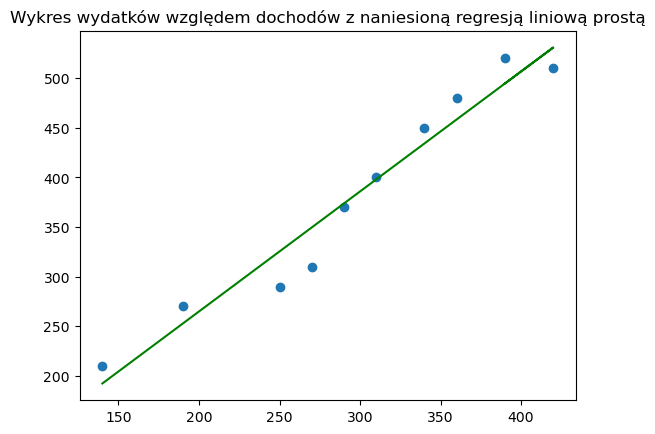

: 

: 

In [ ]:
# ===== Twoja implementacja tutaj =====
w_avg = sum(w)/len(w)
d_avg = sum(d)/len(d)

numerator_sum = 0
denumerator_sum = 0

for i in range(len(w)):
    numerator_sum += d[i] * (w[i] - w_avg)
    denumerator_sum += (w[i] - w_avg) ** 2

# Prosta regresja liniowa
print("--------------Prosta regresja liniowa--------------")
a_simple = numerator_sum/denumerator_sum
b_simple = d_avg - (a_simple * w_avg)

line_1 = (a_simple * w) + b_simple

err1 = []

for i in range(len(d)):
    err = d[i] - line_1[i]
    err1.append(err)
    print(f"Dla dochodów: {w[i]}, błąd regresji wyniósł {err}")

norm_err = np.linalg.norm(err1)
print(f"Dla przeprowadzonej prostej regresji błąd wyniósł {norm_err}")

# Implementacja regresji wielomianowej
print("-------------Dopasowanie wielomianowe---------------")
a_poly, b_poly = np.polyfit(w, d, 1)
err2 = []
line_2 = a_poly * w + b_poly

for i in range(len(d)):
    err = d[i] - line_2[i]
    err2.append(err)

    print(f"Dla dochodów: {w[i]}, błąd regresji wyniósł {err}")

norm_err2 = np.linalg.norm(err2)
print(f"Dla przeprowadzonej prostej regresji błąd wyniósł {norm_err2}")

fig, ax = plt.subplots()
ax.plot(w, d, 'o')
ax.plot(w, line_1, 'g')
# ax.plot(w, line_2, 'r') - jest identyczne jak regresja prosta
ax.set(title='Wykres wydatków względem dochodów z naniesioną regresją liniową prostą')

**Wnioski** <br>
Uzyskana regresja liniowa dobrze opisuje zależność między wydatkami a dochodami, choć występują niewielkie odchylenia dla niektórych punktów. Norma błędu wyniosła ok. 72.37, co wskazuje na umiarkowane dopasowanie. Dopasowanie wielomianowe nie poprawiło wyniku, więc model linniowy jest wystarczający do opisu tej zależności.

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

first.shape, a.shape, y.shape: (100, 2) (2,) (100, 1)


[Text(0.5, 0, 'x1'), Text(0.5, 0.5, 'x2'), Text(0.5, 0, 'z')]

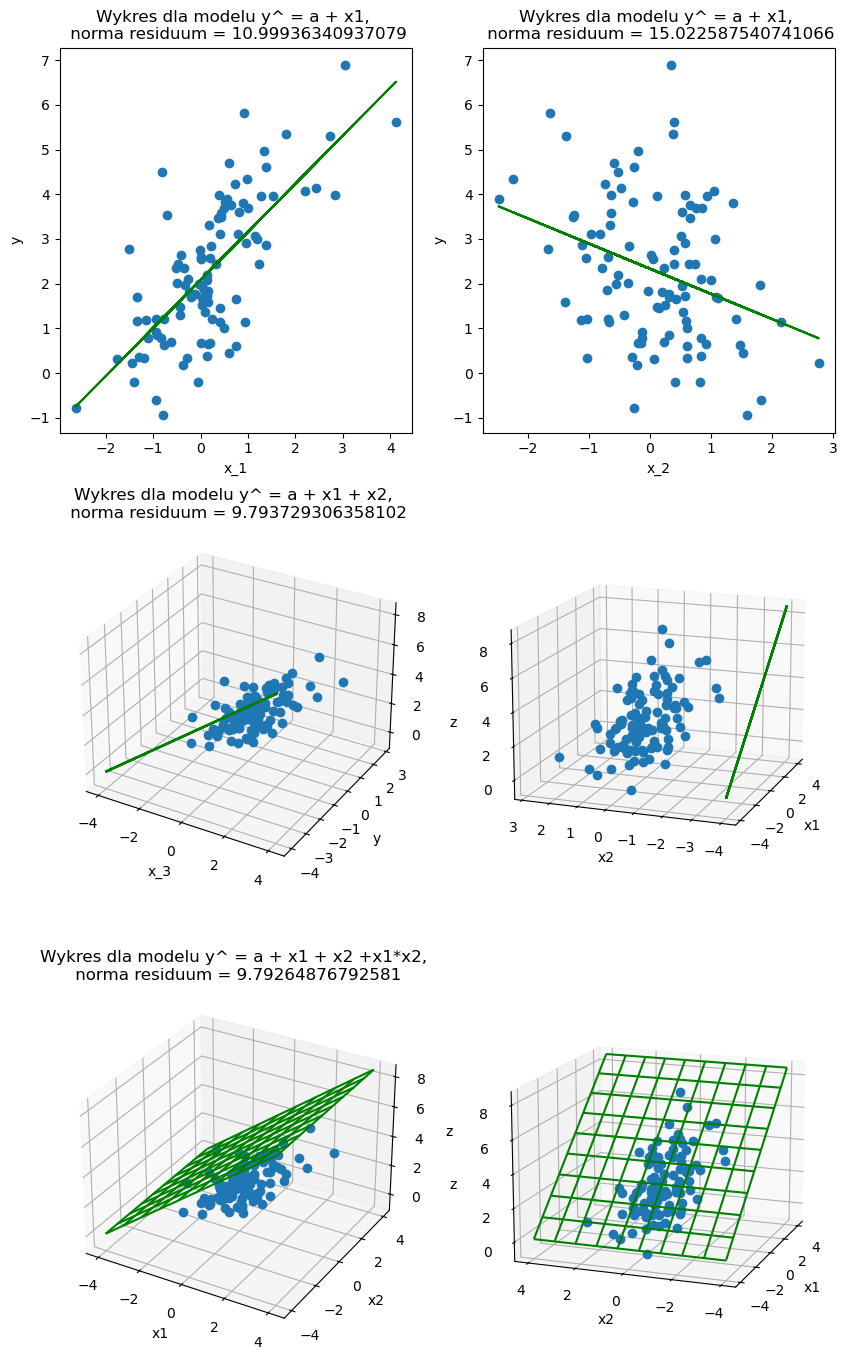

: 

In [ ]:
# Modified fcn, so the code below works (as it is)
def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float | None:
    x = x.flatten()
    b = b.flatten()
    if not (isinstance(A, np.ndarray) and isinstance(b, np.ndarray) and isinstance(x, np.ndarray)):
        return None
    if A.ndim != 2 or x.ndim !=1 or b.ndim != 1:
        return None
    
    
    
    m, n = A.shape
    if x.shape[0] != n or b.shape[0] != m:
        return None
    
    return np.linalg.norm(b - (A @ x))

# ===== Twoja implementacja tutaj =====
x_1 = np.random.normal(loc=0.0, scale=1.0, size=(100,1))
x_2 = np.random.normal(loc=0.0, scale=1.0, size=(100,1))
e = np.random.normal(loc=0.0, scale=1.0, size=(100,1))
ones = np.ones([100, 1])

first = np.concatenate([ones, x_1], 1)
second = np.concatenate([ones, x_2], 1)
third = np.concatenate([ones, x_1, x_2], 1)
fourth = np.concatenate([ones, x_1, x_2, x_1 * x_2], 1)

y = (2 + x_1 - 0.5 * x_2 + e)
fig = plt.figure(figsize=(10, 17))

a_x0 = fig.add_subplot(3, 2, 1)
a_x1 = fig.add_subplot(3, 2, 2)
a_x2 = fig.add_subplot(3, 2, 3, projection='3d')
a_x3 = fig.add_subplot(3, 2, 4, projection='3d')
a_x4 = fig.add_subplot(3, 2, 5, projection='3d')
a_x5 = fig.add_subplot(3, 2, 6, projection='3d')


# y^ = a + x1

Q, R = np.linalg.qr(first)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q).flatten()
y_first = a[0] + a[1]*x_1
print("first.shape, a.shape, y.shape:", first.shape, a.shape, y.shape)

norm_first = residual_norm(first, a, y)

a_x0.plot(x_1, y, 'o')
a_x0.plot(x_1, y_first, 'g')
a_x0.set(title=f'Wykres dla modelu y^ = a + x1, \n norma residuum = {norm_first}', xlabel='x_1', ylabel='y')


# y^ = a + x2

Q, R = np.linalg.qr(second)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)
y_second = a[0] + a[1]*x_2
norm_second = residual_norm(second, a, y)

a_x1.plot(x_2, y, 'o')
a_x1.plot(x_2, y_second, 'g')
a_x1.set(title=f'Wykres dla modelu y^ = a + x1, \n norma residuum = {norm_second}', xlabel='x_2', ylabel='y')


# y^ = a + x1 + x2

Q, R = np.linalg.qr(third)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)
x_ax, y_ax = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-4, -4, 10))
z_third = a[0] + a[1] * x_ax +a[2] * y_ax
norm_third  = residual_norm(third , a, y)

a_x2.plot(x_1, x_2, y, 'o')
a_x2.plot_wireframe(x_ax, y_ax, z_third, color='g')
a_x2.set(title=f'Wykres dla modelu y^ = a + x1 + x2, \n norma residuum = {norm_third}', xlabel='x_3', ylabel='y')

a_x3.plot(x_1, x_2, y, 'o')
a_x3.plot_wireframe(x_ax, y_ax, z_third, color = 'g')
a_x3.view_init(15, 200, 0)
a_x3.set(xlabel='x1', ylabel='x2', zlabel='z')


# y^ = a +x1 + x2 + x1*x2
Q, R = np.linalg.qr(fourth)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)

x_ax, y_ax = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-4, 4, 10))
z_fourth = a[0] + a[1] * x_ax + a[2] * y_ax + a[3] * x_ax * y_ax

norm_fourth = residual_norm(fourth, a, y)

a_x4.plot(x_1, x_2, y, 'o')
a_x4.plot_wireframe(x_ax, y_ax, z_third, color = 'g')
a_x4.set(title=f'Wykres dla modelu y^ = a + x1 + x2 +x1*x2, \n norma residuum = {norm_fourth}')
a_x4.set(xlabel='x1', ylabel='x2', zlabel='z')

a_x5.plot(x_1, x_2, y, 'o')
a_x5.plot_wireframe(x_ax, y_ax, z_third, color = 'g')
a_x5.view_init(15, 200, 0)
a_x5.set(xlabel='x1', ylabel='x2', zlabel='z')

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)